In [1]:
trials_names = ['resnet20_dou_activation_bug_adam_2e-4',
               'resnet110_adam_2e-4']

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import bottleneck
import torch
from helpers.experiment_file_management import load_trial_results
trials = {k:load_trial_results(k) for k in trials_names}
def plot_smooth(values, window, label, color, linestyle, helper_line_in, inverse=False):
    values = bottleneck.move_mean(values, window, window)[window:-window]
    if inverse:
        values = 1 - values
    best_v = {'min':np.min(values), 'max':np.max(values)}[helper_line_in]
    plt.axhline(best_v, alpha=0.3, color=color, linestyle=linestyle)
    plt.plot(values, label=f'{best_v:.5f} {label}', color=color, linestyle=linestyle)

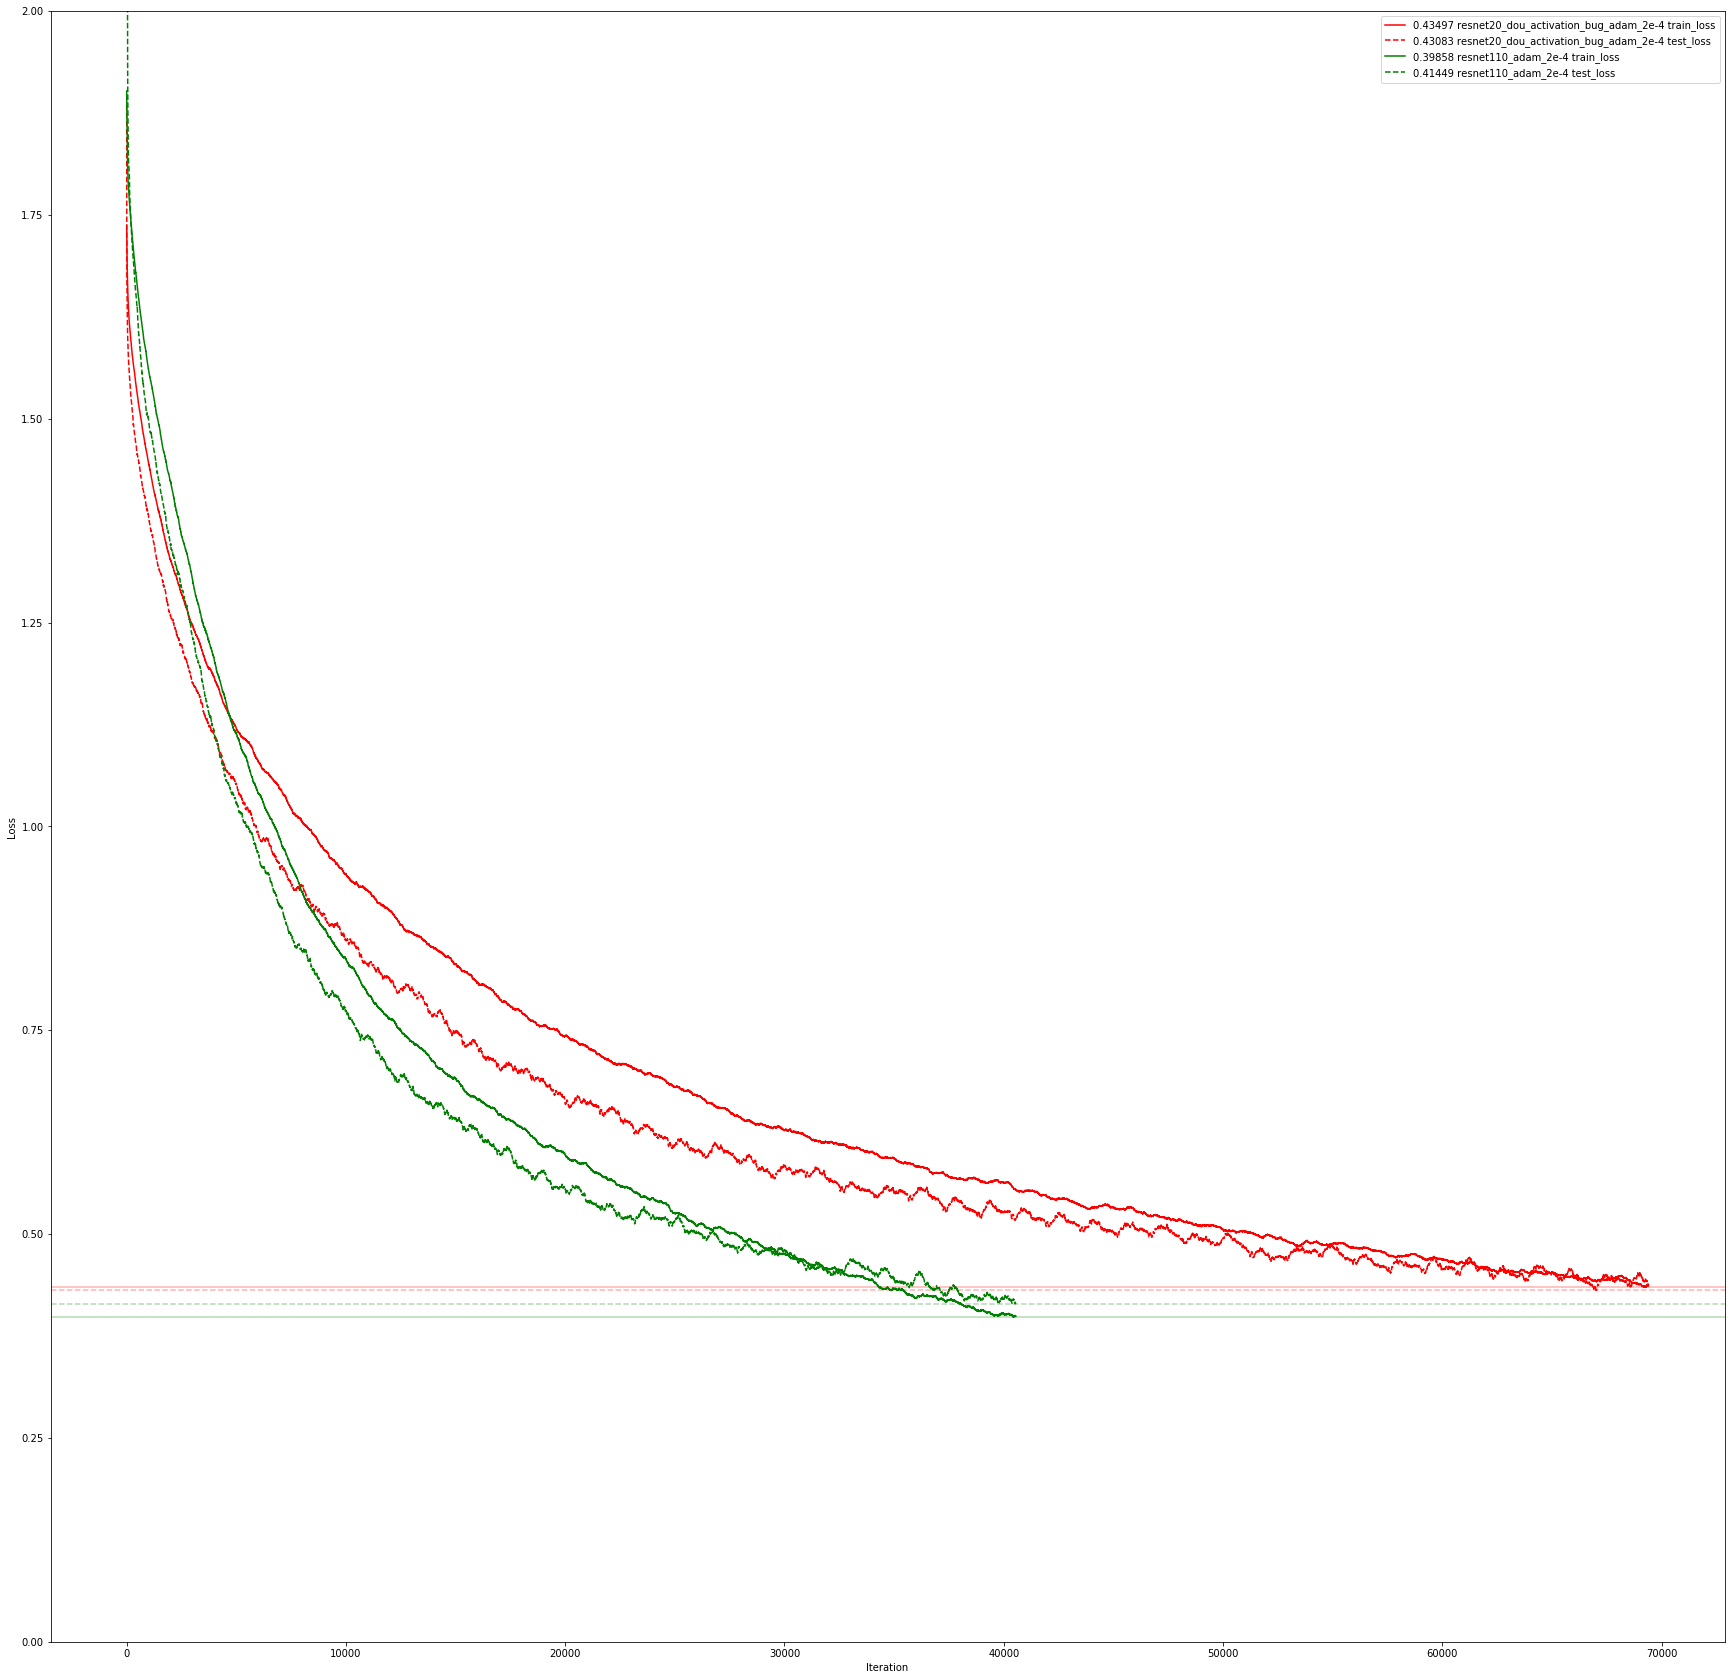

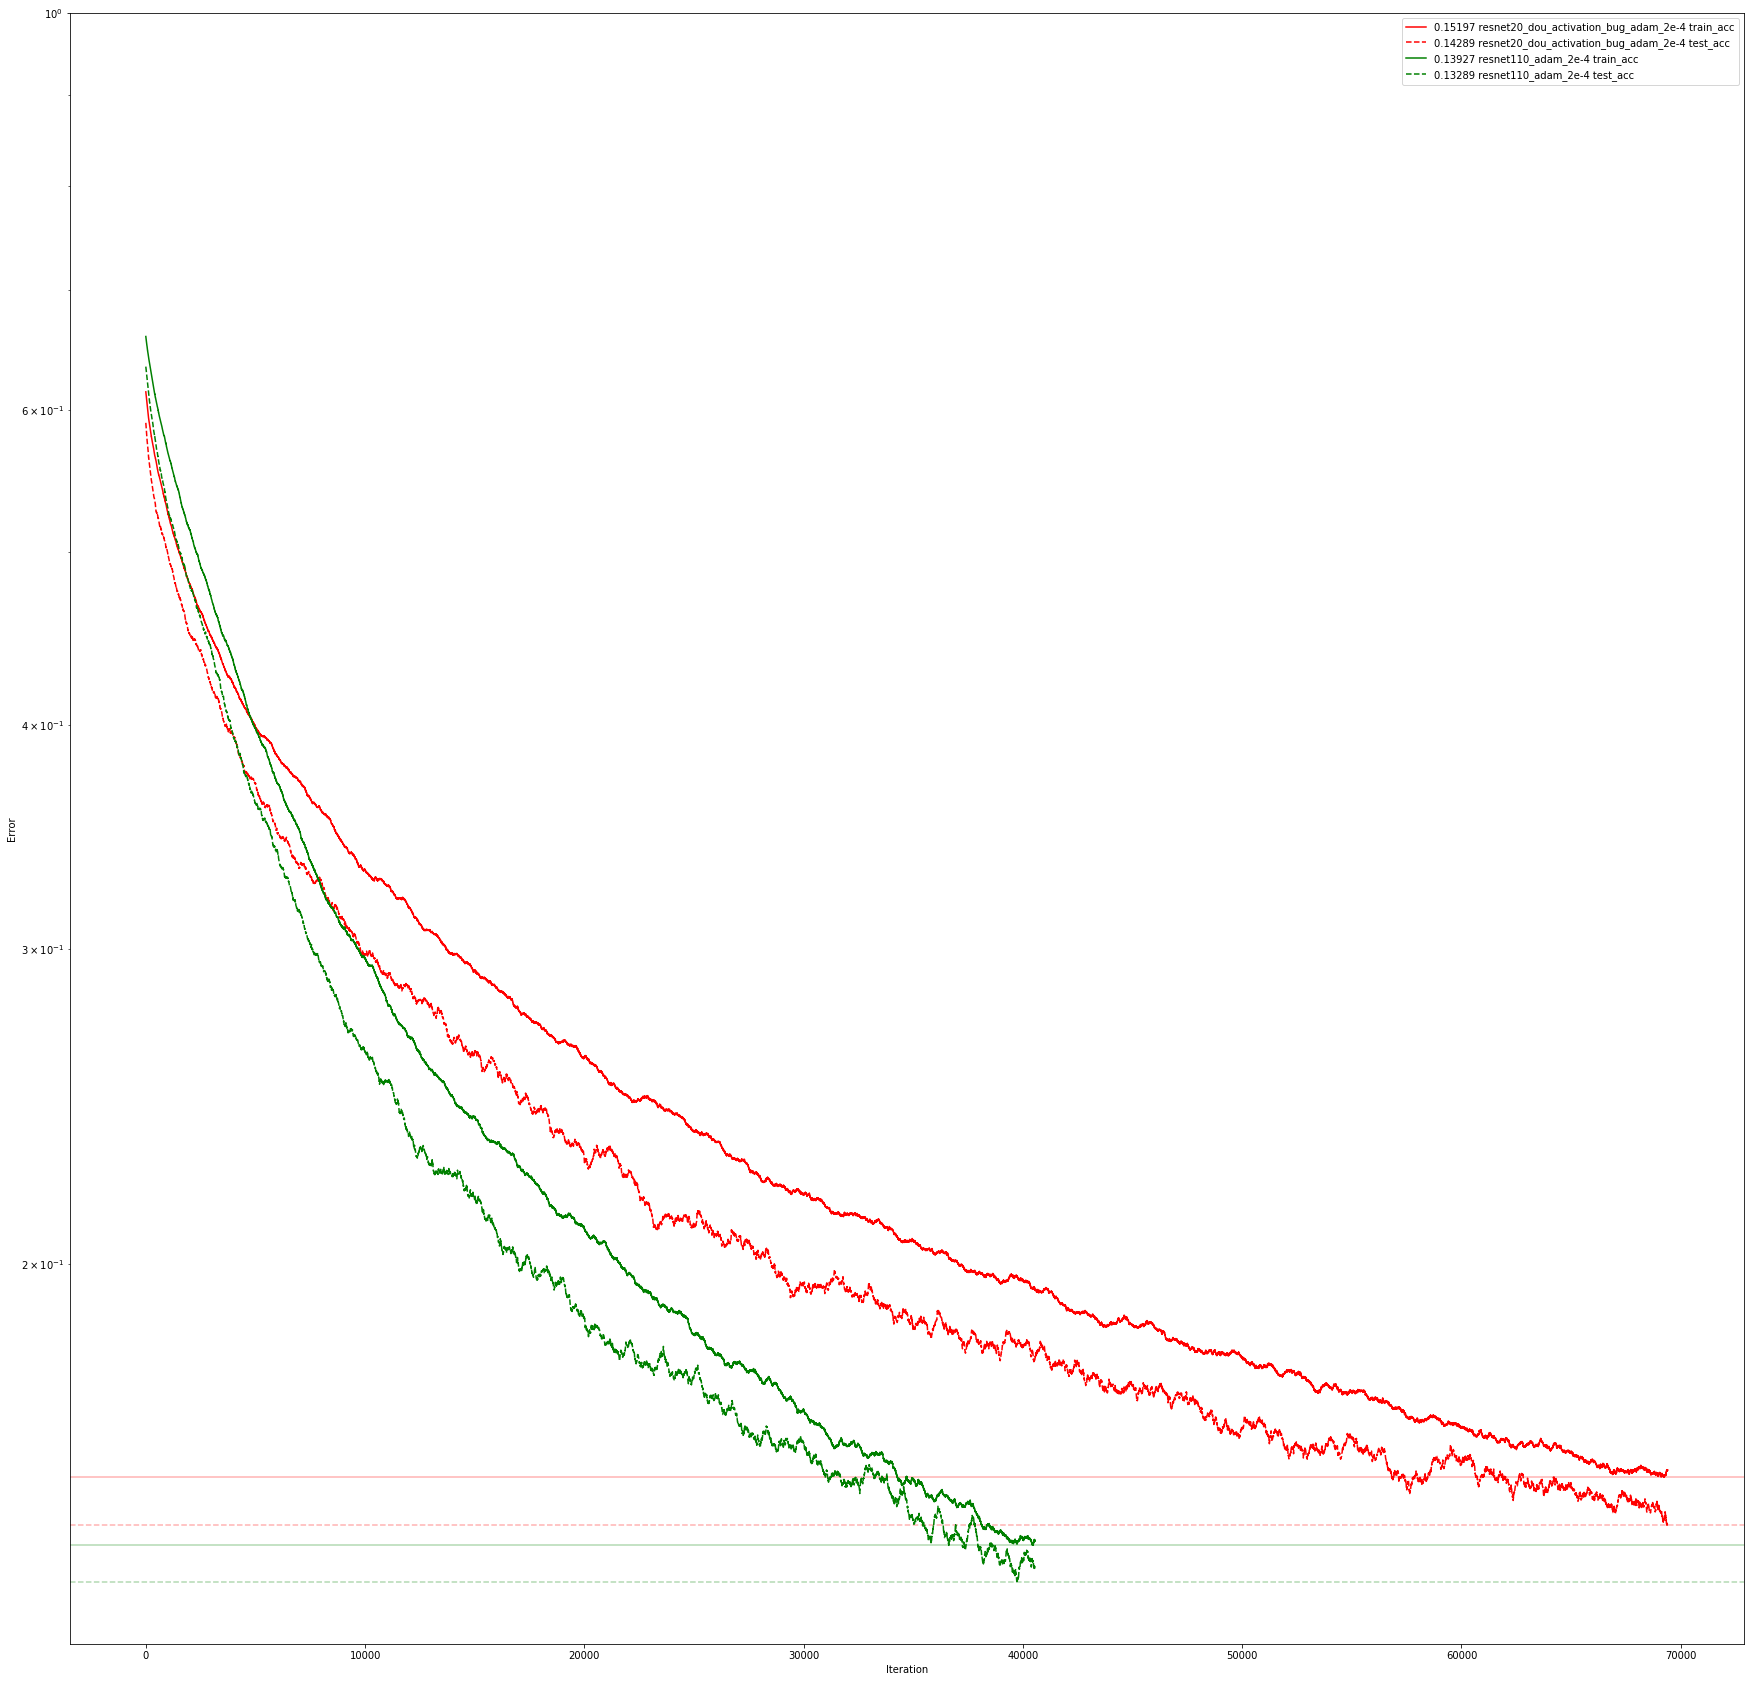

In [8]:
f = plt.figure(figsize=(30,30))
colors = ['r', 'g', 'b', 'purple', 'cyan']
window = 2000

plt.ylabel('Loss')
plt.xlabel('Iteration')

for i,(k,v) in enumerate(trials.items()):
    plot_smooth(v['train_loss'], window, f'{k} train_loss',colors[i], '-','min')
    plot_smooth(v['test_loss'], window, f'{k} test_loss', colors[i], '--','min')

plt.ylim((0,2))
plt.legend()
plt.show()

f = plt.figure(figsize=(30,30))

plt.yscale('log')
plt.ylabel('Error')
plt.xlabel('Iteration')

for i,(k,v) in enumerate(trials.items()):
    plot_smooth(v['train_acc'], window, f'{k} train_acc',colors[i], '-', 'min', True)
    plot_smooth(v['test_acc'], window, f'{k} test_acc', colors[i], '--', 'min', True)

plt.ylim(top=1)
plt.legend()
plt.show()